# Avacado Price Forecasting

**About the dataset** :

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

**Main goal** :

To Predict / Forecast the price value of avocado with the time series dataset ( A MULTIVARIATE INPUT TO UNIVARIATE OUTPUT )

**Column Information** :
- Date :The date of the observation
- AveragePrice : the average price of a single avocado
- Total Volume : Total number of avocados sold
- 4046 : Total number of avocados with PLU 4046 sold
- 4225 : Total number of avocados with PLU 4225 sold
- 4770 : Total number of avocados with PLU 4770 sold
- Total Bags : Total number of bags
- Small Bags : Total number of small bags
- Large Bags : Total number of large bags
- XLarge Bags : Extra Large Bags
- type : conventional or organic
- year : year of the date
- region : the city or region of the observation

# Importing Libraries

In [74]:
!pip install keras-tuner

In [154]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.stattools import acf, pacf

SEED_VALUE = 1234
np.random.seed(SEED_VALUE)
import random
random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

from statsmodels.tsa.stattools import adfuller
import itertools
import datetime
from operator import itemgetter
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder,MinMaxScaler

SEED_VALUE=123
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

In [76]:
print('num Device: ',len(tf.config.experimental.list_physical_devices()))
print(tf.config.experimental.list_physical_devices())

num Device:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# EDA

## Import Datasets

In [77]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Overall Datasets Column information

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [79]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


dari data yang ada secara nilai min dan max kita bisa melihat tidak ada angka yang negatif. Cuman disini ada unnamed dimana ini kita akan drop karena nantinya tidak akan membantu model kita belajar

In [80]:
df = df.drop(columns=['Unnamed: 0'])

In [81]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Checking Missing Values

In [82]:
df.isna().sum()

,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


Ga ada Missing Values jadi kita lanjut check duplicates

## Checking Duplicates

In [83]:
duplicates = df.duplicated().sum()
print("Total Duplicates:", duplicates)

Total Duplicates: 0


no dups jadi kita lanjut untuk cek unique value dari categorical value

## Unique Categorical Values

In [84]:
print("\nUnique Values for Categorical Columns:")
for col in ['type', 'region']:
    print(f"{col}: {df[col].unique()}")


Unique Values for Categorical Columns:
type: ['conventional' 'organic']
region: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


ga ada typo juga untuk unique categoricalnya sehingga kita bisa lanjut ke visualization

## Visualization For Numerical & Categorical Values

disini sebelum saya split saya mau compare untuk visualization dari column forecasting saya dimana saya mencompare dengan Average Price Yang belum disorting dengan index date sama yang udah disorting dengan index date

In [85]:
df1 = df.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


## Line Chart And Distribution For Average Price ( Forecast Column )

<ipython-input-86-4926b3ebd7a3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AveragePrice'])
<ipython-input-86-4926b3ebd7a3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AveragePrice'])


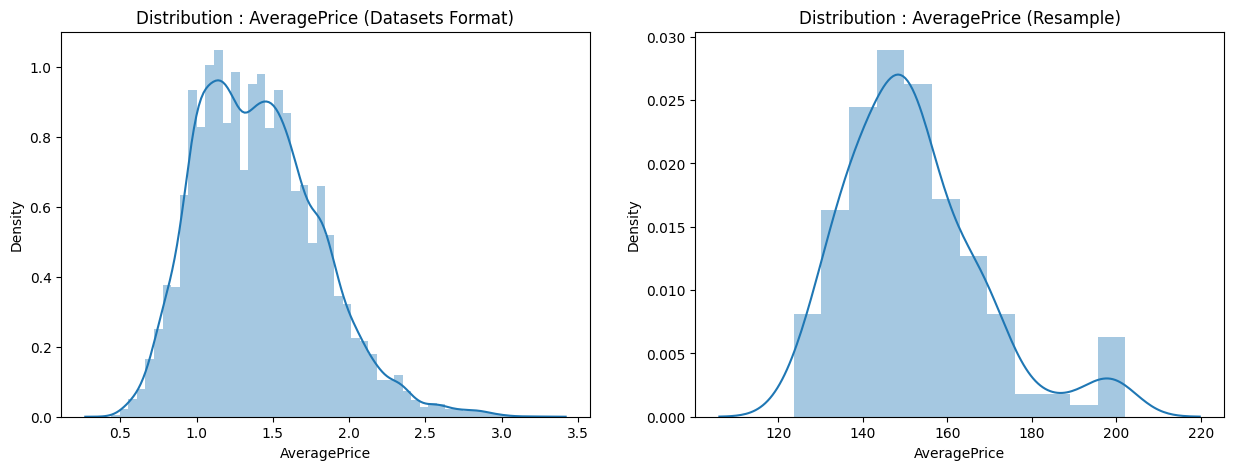

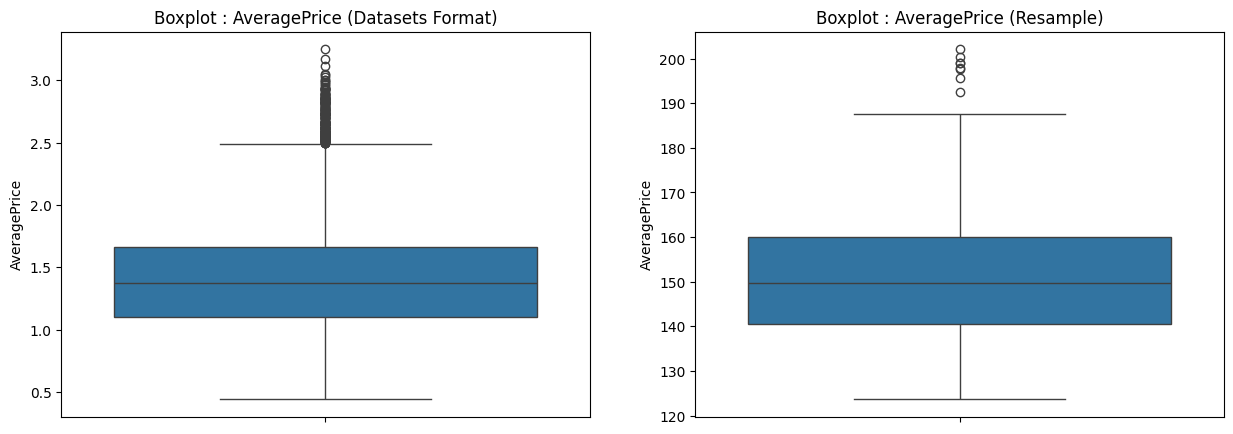

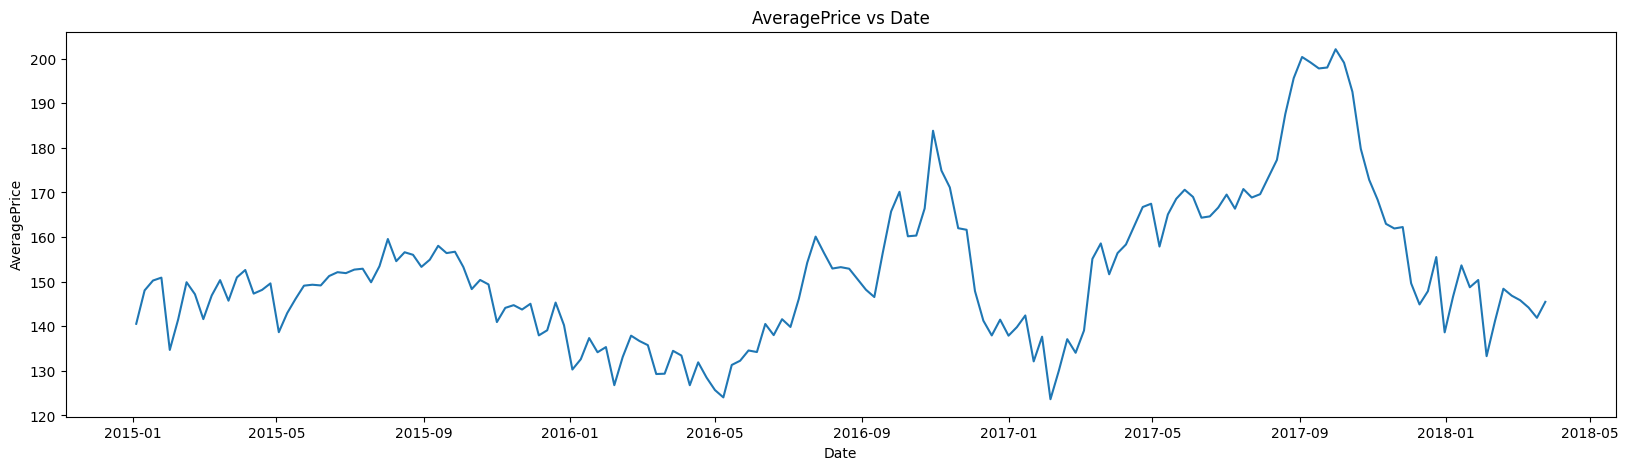

In [86]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))


plt.subplot(1, 2, 1)
sns.distplot(df['AveragePrice'])
plt.title('Distribution : AveragePrice (Datasets Format)')


plt.subplot(1, 2, 2)
sns.distplot(df1['AveragePrice'])
plt.title('Distribution : AveragePrice (Resample)')


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = df['AveragePrice'])
plt.title('Boxplot : AveragePrice (Datasets Format)')


plt.subplot(1, 2, 2)
sns.boxplot(y = df1['AveragePrice'])
plt.title('Boxplot : AveragePrice (Resample)')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 5))
plt.subplot(1, 1, 1)
sns.lineplot(x = df1.index, y = 'AveragePrice', data = df1)
plt.title('AveragePrice vs Date')

plt.show()
fig.tight_layout(pad = 2)


Analisis :

Histogram Plot (kiri): kurva sebelah kiri menunjukkan nilai sebaran AveragePrice, di mana puncak kurva menandakan harga yang paling sering muncul. disini kita lihat jika puncak ada di sekitar 1.0-1.5, berarti kebanyakan harga alpukat berada di kisaran tersebut.

Histogram Plot(kanan) : Kurva sebelah kanan ini dataset yang udah kita resample dimana urutannya berdasarkan date nya dan disini kita bisa melihat kalau kurva yang dihasilkan lebih normal dari sebelah kiri

Line Plot (kanan): untuk line plot kita bisa melihat nilai atau titik AveragePrice terhadap waktu (Date), dimana ini tuh memperlihatkan tren kenaikan/turunan harga. Misalnya, jika garis turun di tahun 2018, berarti harga cenderung meningkat di periode itu.

Boxplot ( Kiri / Kanan ) :
Baik yang udah di sample dan resample dua duanya ada outliers. tapi karena masih wajar kita biarin nantinya, nanti kita akan pakai robust untuk mengatasi outliers ini

## Splitting Categorical & Numerical Column

In [87]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : type year
Numerical Features : Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags


disini kita split numerical dan categorical karena kita mua visualisasiin.

## Categorical Visualization

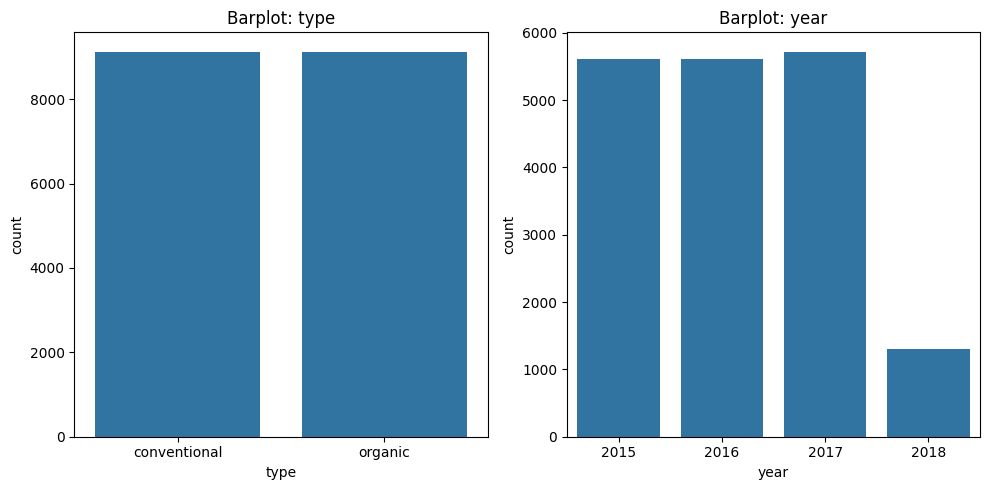

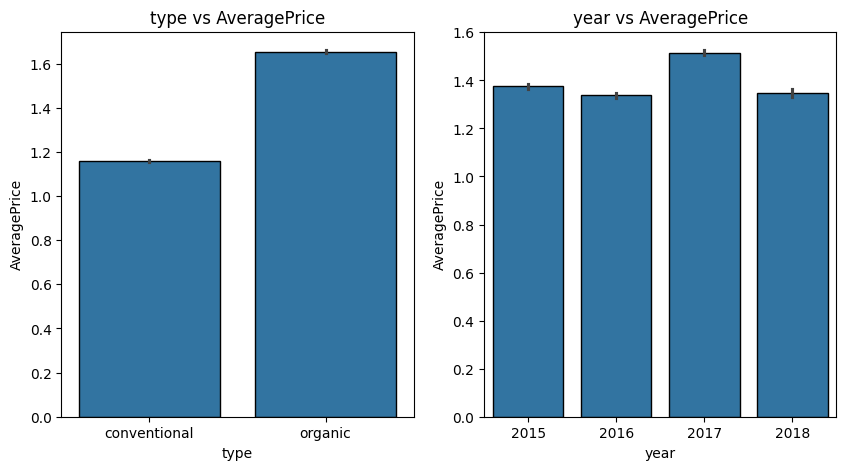

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i in range(len(categorical_features)):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    title = 'Barplot: ' + categorical_features[i]
    plt.title(title)
plt.tight_layout()

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):
    plt.subplot(1,2,i+1)
    sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = df,edgecolor = 'black')
    title = categorical_features[i] + ' vs AveragePrice'
    plt.title(title);

1. Grafik Jenis Produk (kiri): Batang "conventional" dan "organic" menunjukkan jumlah kemunculan tiap jenis. Misalnya, batang "conventional" lebih tinggi, artinya produk konvensional lebih dominan dalam dataset. good news nya mereka ga inbalance.

2. Grafik Tahun (kanan): Batang tahun 2015–2018 menunjukkan frekuensi data per tahun. Misalnya, tahun 2017 memiliki batang tertinggi, artinya data paling banyak dikumpulkan di tahun tersebut. tapi sayangnya tahun 2018 kelihatan lebih inbalance datanya karena batang yg lebih pendek dr lainnya dan jauh di bawah

3. Grafik Jenis produk dibandingin dengan avg price : disini kita bisa lihat kalau average price untuk conventional type, dia lebih rendah harganya. Sedangkan organic dia lebih tinggi pricenya

4. Grafik Tahun dibandingin dengan avg price : dilihat kalau disini comparison average price untuk tiap tahunnya tak berbeda jauh walaupun data pada tahun 2018 lebih inbalance jumlahnya.

## Numerical Visualization

<ipython-input-89-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical_features[i]])
<ipython-input-89-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical_features[i]])
<ipython-input-89-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated f

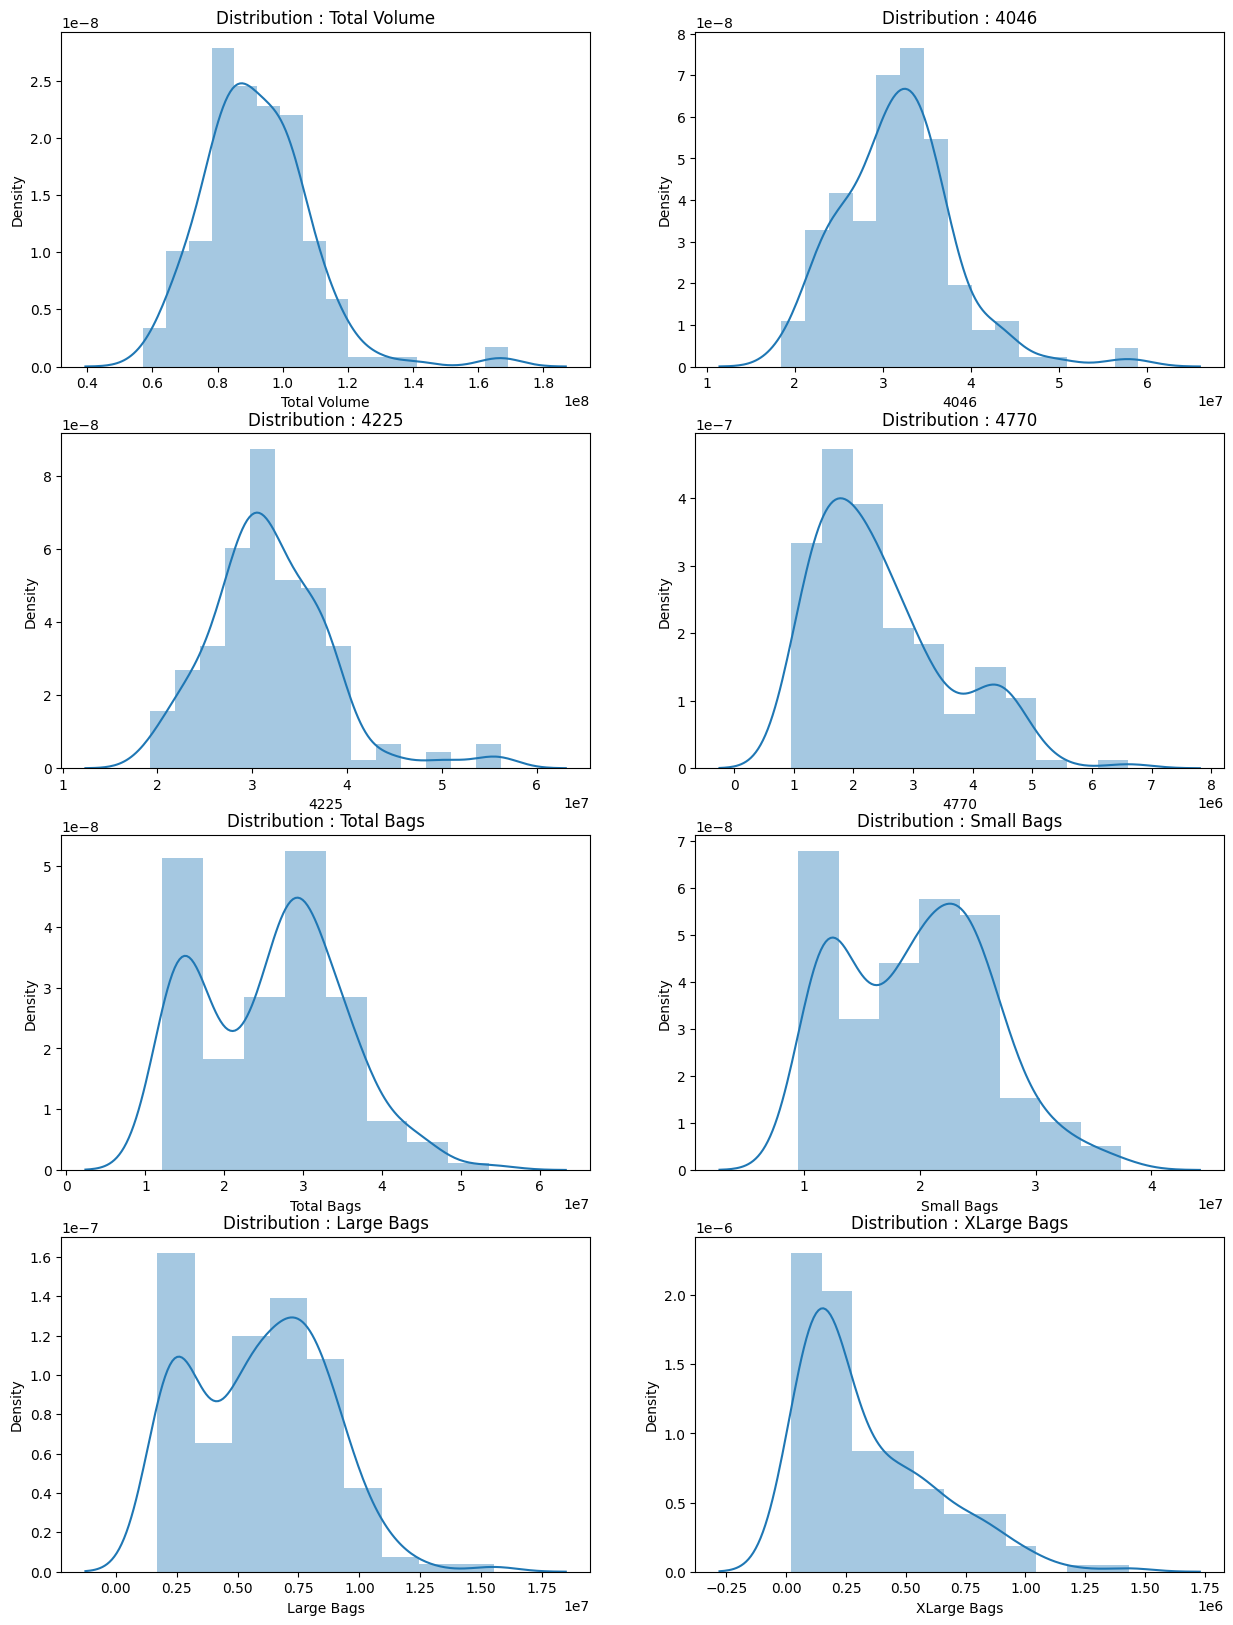

In [89]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,20))
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.distplot(df1[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
fig.tight_layout(h_pad = 10,w_pad = 5)

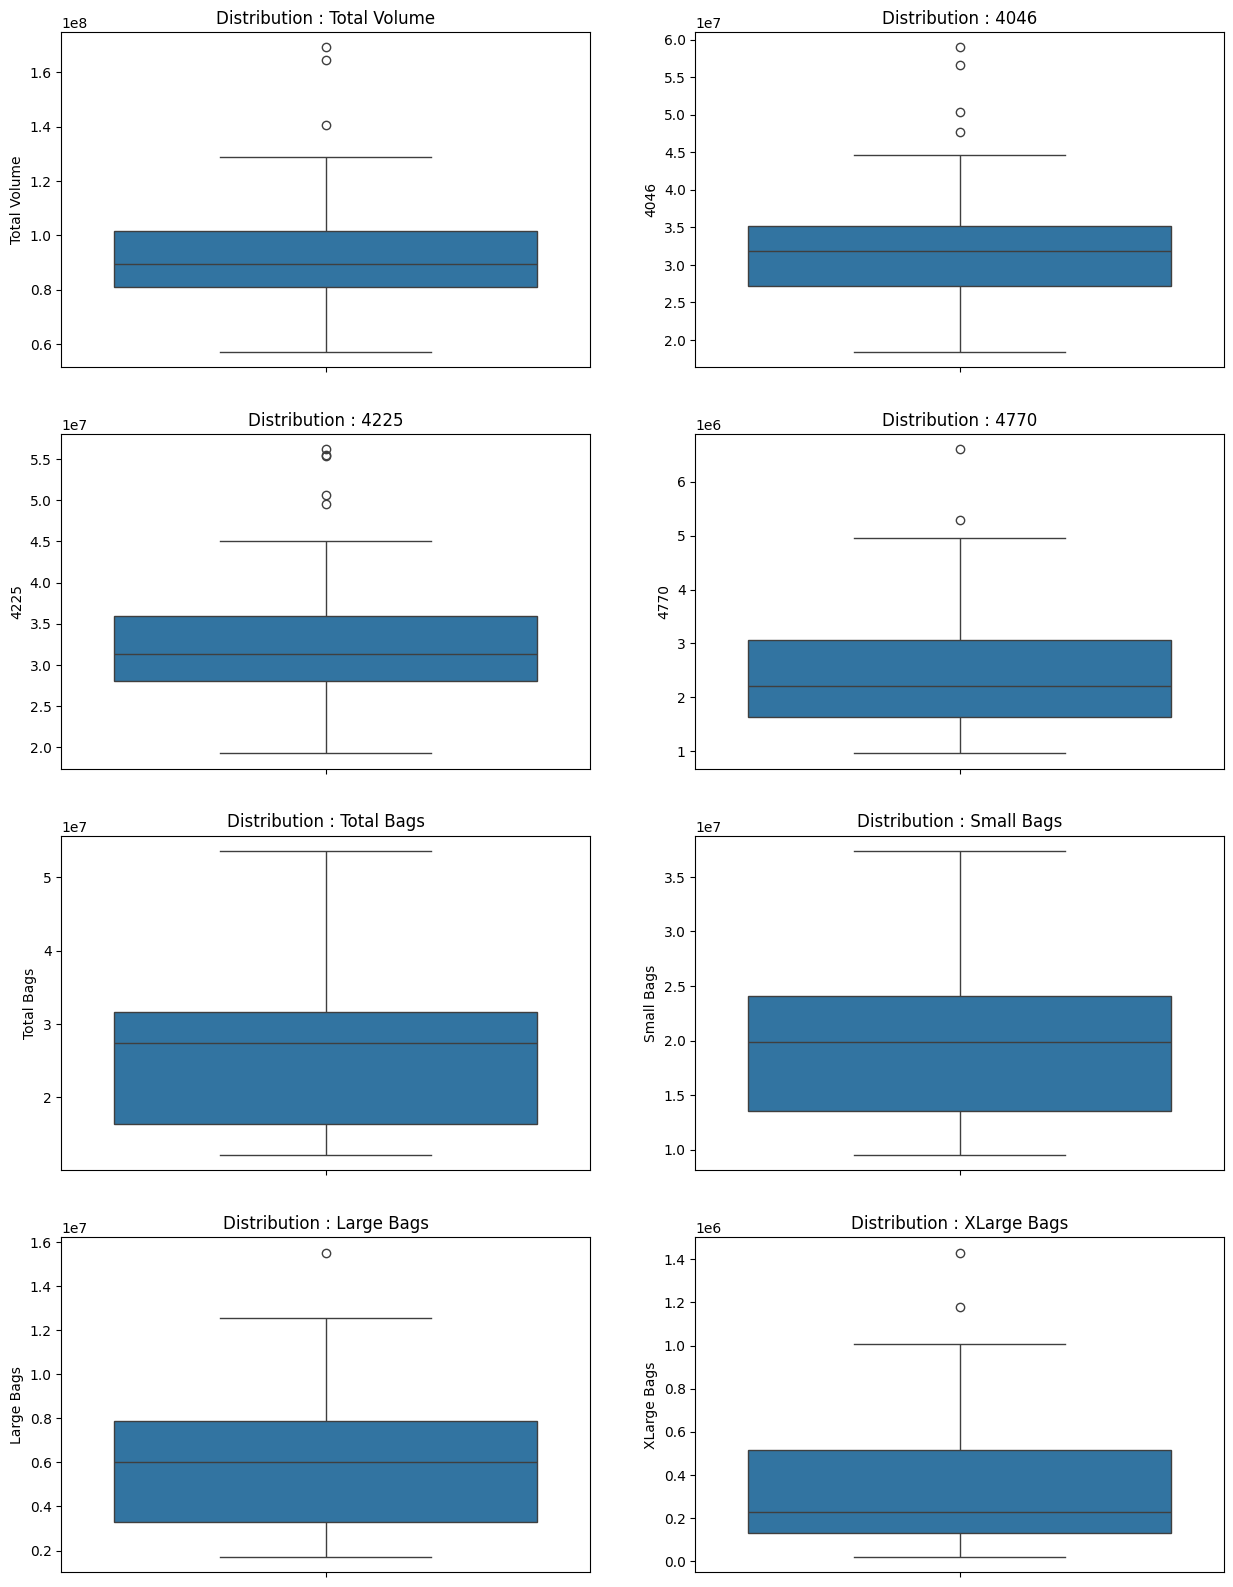

In [90]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,20))
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df1[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
fig.tight_layout(h_pad = 10,w_pad = 5)

1. Distribution : Total Volume

Grafik ini menunjukkan distribusi dari total volume produk. Distribusinya miring ke kanan (positively skewed), yang berarti sebagian besar nilai volume berada di kisaran yang lebih rendah, namun terdapat beberapa data dengan volume yang sangat tinggi (outlier). Ini mengindikasikan bahwa meskipun sebagian besar transaksi atau produksi memiliki volume sedang hingga kecil, ada beberapa kejadian dengan volume yang sangat besar yang perlu diperhatikan dalam analisis lanjutan. Tapi karena masih wajar kita biarin

2. Distribution : 4046

Distribusi data untuk kode produk 4046 juga miring ke kanan, menunjukkan sebagian besar penjualan berada di kisaran volume menengah, dengan beberapa outlier bernilai tinggi. Ini menandakan pola umum konsumsi yang stabil dengan beberapa lonjakan.

3. Distribution : 4225

Distribusinya mirip dengan 4046, berbentuk skewed ke kanan. Mayoritas volume penjualan berkumpul di kisaran tengah, menunjukkan produk ini cukup konsisten dikonsumsi namun tetap memiliki kasus volume tinggi.

4. Distribution : 4770

Distribusi ini juga tidak simetris, menunjukkan skewness ke kanan. Ada akumulasi data di volume yang rendah hingga sedang, tapi dengan kemunculan beberapa outlier besar.

5. Distribution : Total Bags

Distribusinya tampak bimodal, menunjukkan dua puncak. Ini bisa mengindikasikan adanya dua kelompok pola pengemasan atau distribusi — satu kelompok dengan volume kantong kecil dan satu lagi dengan volume lebih besar.

6. Distribution : Small Bags

Distribusi ini cukup mirip dengan Total Bags namun lebih jelas menunjukkan dua puncak, menandakan variasi pola pengemasan kecil dan tidak merata.

7. Distribution : Large Bags

Terlihat ada puncak di volume rendah dan sedang, serta distribusi yang miring ke kanan. Ini mengindikasikan bahwa sebagian besar volume dalam kantong besar cenderung lebih kecil, dengan sedikit kasus volume besar.

8. Distribution : XLarge Bags

Distribusinya sangat miring ke kanan dan sebagian besar nilai mendekati nol, artinya penggunaan kantong ekstra besar jarang terjadi. Sebagian besar data mendekati nol bahkan dengan outlier kecil.

## Anaylsis For The Trends

## Checking Stationarity

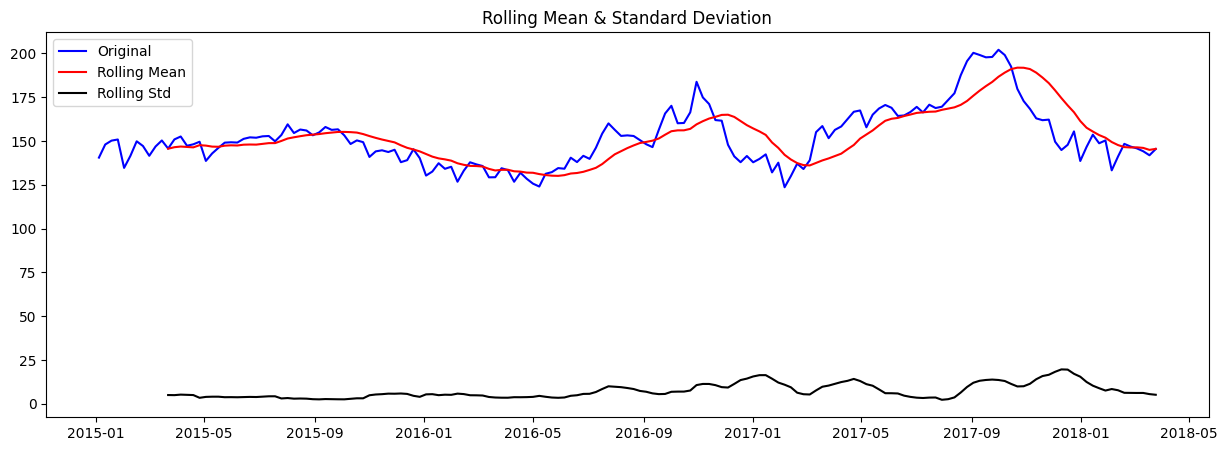

Results of Dickey-Fuller Test:
Test Statistic                  -2.363645
p-value                          0.152261
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [91]:
def test_stationarity(timeseries):
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df1['AveragePrice'])

nah kalau dilihat dari Dickey Fuller test kalau data kita ini ga stationer artinya apa artinya mean atau variance yang ada pada dataset kita ga konstan tapi berubah berubah.

## Checking Trends

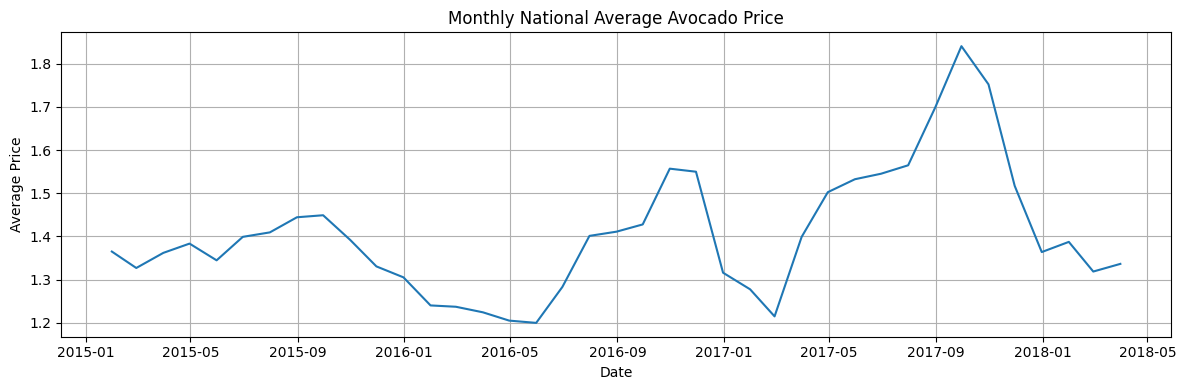

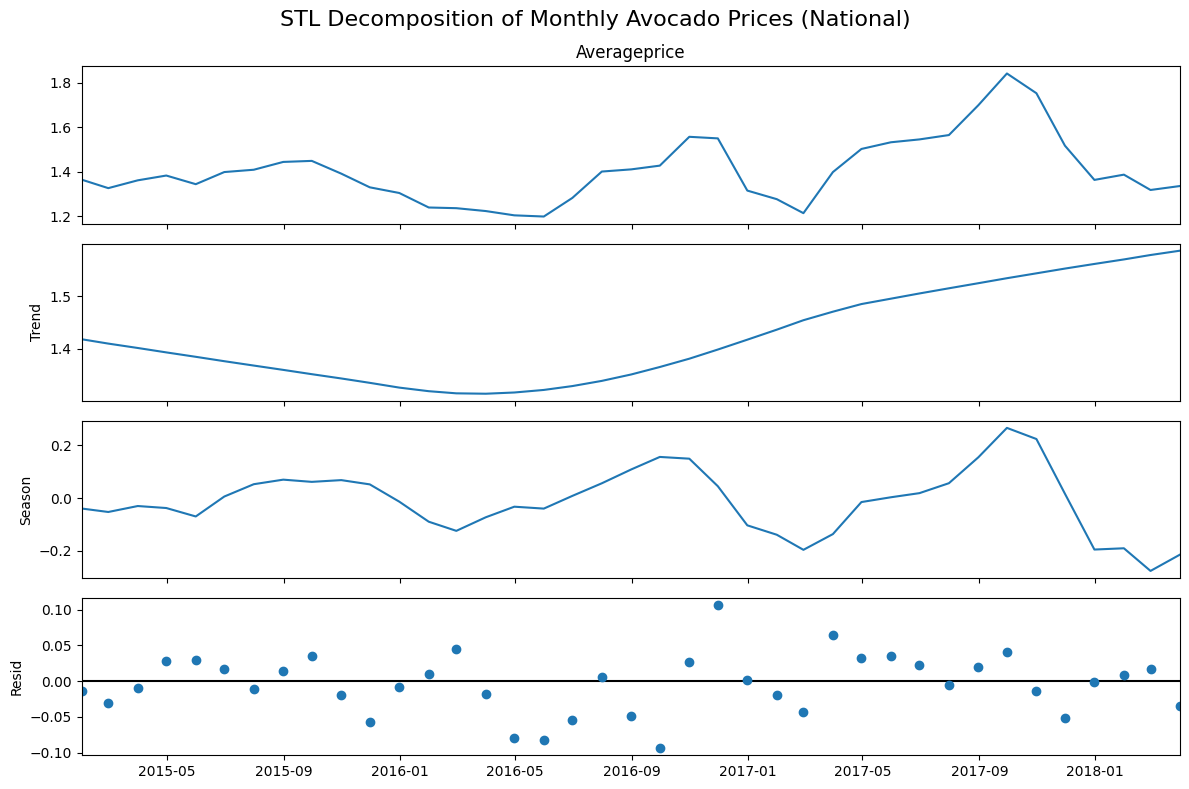

In [92]:
df.columns = df.columns.str.strip().str.capitalize()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
monthly_avg_price = df['Averageprice'].resample('ME').mean()

plt.figure(figsize=(12, 4))
sns.lineplot(data=monthly_avg_price)
plt.title("Monthly National Average Avocado Price")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

stl = STL(monthly_avg_price, period=12)
res = stl.fit()

fig = res.plot()
fig.set_size_inches(12, 8)
plt.suptitle('STL Decomposition of Monthly Avocado Prices (National)', fontsize=16)
plt.tight_layout()
plt.show()

1. Trend

Pertama untuk trend, disini trend yg ada menggambarkan arah pergerakan jangka panjang dari harga rata-rata alpukat. Dari grafik, terlihat bahwa harga sempat mengalami penurunan secara perlahan dari awal 2015 hingga pertengahan 2016, sebelum akhirnya meningkat stabil sampai awal 2018. Ini menunjukkan adanya perubahan pola struktural yang bisa disebabkan oleh faktor ekonomi makro, distribusi, atau permintaan pasar. Secara umum, data menunjukkan kecenderungan kenaikan harga dalam jangka panjang.

2. Seasonal

Lalu untuk seasonal menunjukkan pola yang berulang secara teratur setiap tahun. Dalam data ini, terlihat fluktuasi musiman dengan siklus kurang lebih tahunan, di mana harga cenderung meningkat dan menurun pada waktu-waktu tertentu setiap tahun. Pola ini konsisten dan menunjukkan bahwa ada faktor musiman—seperti musim panen, libur nasional, atau preferensi konsumen tahunan—yang mempengaruhi harga alpukat secara rutin. Selain itu kita juga tahu kalau buah itu biasanya in real life kita kayak blg ( blm musimnya atau ini musimnya)

3. Cyclic

Meski STL lebih fokus memisahkan komponen musiman daripada siklus (cyclic), kita bisa menyimpulkan bahwa tidak ada pola siklik jangka panjang yang jelas di luar tren dan musim. Karena data ini hanya mencakup beberapa tahun dan tidak menunjukkan pola siklik besar yang non-musiman, maka komponen siklik bisa dianggap tidak dominan atau tidak signifikan dalam data ini. Anyways, biasanya kalau cyclic dia kan ga jelas pola peak to peaknya ga sama tapi kalau ini kita bisa lihat kayak dia selalu mulai memuncak di bulan 9 - 11 lalu turun di bulan 12 ke 1.

## PACF For Window length

ini n lagnya kita set tahunan yaitu 365 ya ges ya

In [113]:
np.abs(pacf(df['Averageprice'], nlags=365))

array([1.00000000e+00, 9.04324097e-01, 2.41339439e-01, 1.32703332e-01,
       8.75496483e-02, 1.28620776e-02, 1.70460995e-02, 6.74024155e-03,
       1.94428554e-02, 2.86664643e-02, 4.73574840e-03, 1.09264801e-02,
       1.24665966e-02, 4.28775624e-03, 9.14791597e-03, 1.18481722e-03,
       1.00311484e-02, 9.78669650e-03, 2.01173242e-02, 2.55720732e-05,
       3.41169797e-03, 3.93545260e-03, 2.11915026e-02, 6.47815890e-03,
       3.87010130e-02, 3.59981815e-03, 2.98187498e-02, 6.99199242e-03,
       4.87901242e-03, 3.93843804e-02, 4.40387021e-02, 2.15823335e-02,
       1.27470890e-02, 1.55912904e-02, 3.72177764e-02, 1.90683113e-02,
       5.47603584e-03, 1.73243080e-02, 2.74737064e-02, 2.23075815e-02,
       3.72502640e-02, 2.63900286e-02, 4.78189593e-02, 2.95965547e-02,
       2.67946422e-02, 1.53872567e-02, 3.01236394e-02, 3.61556697e-02,
       2.79617002e-02, 5.56358061e-03, 1.30894430e-02, 2.57616476e-02,
       4.29543621e-02, 2.19724422e-02, 5.76478934e-02, 3.41261535e-02,
      

In [116]:
print(np.where(np.abs(pacf(df['Averageprice'],nlags=365))>5e-2)[0])

[ 0  1  2  3  4 54]


kita akan pilih 54 karena disini rows kita lumayan banyak jadi kita ambil yang paling besar aja yaitu 54

## EDA Evaluation

Jadi dari EDA yang ada kita dapat menyimpulkan bahwa data harga rata-rata alpukat merupakan time series bertipe non-stasioner dengan tren dan musiman yang kuat. Ini bukan data stasioner karena mean-nya berubah seiring waktu (karena tren), dan kelihatan dr Tes STL kalau data ini tuh punya komponen musiman tahunan yang konsisten. Seperti di atas kita lihat kalau dia selalu memuncak di bulan 9 ke 11 dan menurun di 12 ke 1.

# Preprocessing

## Splitting Datasets

disini saya drop untuk region karena menurut saya akan lebih better kalau ini digunakan analisis per country sedangkan saya ingin analisis average price secara keseluruhan. Oleh karena itu saya memutuskan untuk drop kolom region

In [120]:
df = df.drop('Region', axis=1, errors='ignore')

In [121]:
val_size, test_size = 0.1, 0.2

df_train = df[:int(len(df)*(1-val_size-test_size))]
df_val = df[int(len(df)*(1-val_size-test_size)):int(len(df)*(1-test_size))]
df_test = df[int(len(df)*(1-test_size)):]

print(df_train.shape, df_val.shape, df_test.shape)

(12774, 11) (1825, 11) (3650, 11)


In [129]:
numerical_columns = numerical_features.columns.tolist()
print(numerical_columns)

['Averageprice', 'Total volume', '4046', '4225', '4770', 'Total bags', 'Small bags', 'Large bags', 'Xlarge bags', 'Year']


In [122]:
df_train

,Averageprice,Total volume,4046,4225,4770,Total bags,Small bags,Large bags,Xlarge bags,Type,Year
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-27,2.07,5306.81,252.27,162.06,23.99,4868.49,4868.49,0.00,0.0,organic,2016
2016-11-20,1.85,6445.71,418.98,235.00,17.56,5774.17,5718.34,55.83,0.0,organic,2016
2016-11-13,1.74,3601.66,252.10,249.01,10.59,3089.96,3089.96,0.00,0.0,organic,2016


In [123]:
df_val

,Averageprice,Total volume,4046,4225,4770,Total bags,Small bags,Large bags,Xlarge bags,Type,Year
Date,,,,,,,,,,,
2016-10-23,1.44,3509.18,40.51,154.23,17.03,3297.41,3297.41,0.00,0.0,organic,2016
2016-10-16,1.79,5193.18,135.24,192.75,11.95,4853.24,4853.24,0.00,0.0,organic,2016
2016-10-09,1.72,4687.32,114.75,193.84,12.44,4366.29,4357.67,8.62,0.0,organic,2016
2016-10-02,1.86,4651.52,199.50,142.72,18.24,4291.06,4282.53,8.53,0.0,organic,2016
2016-09-25,1.91,6840.51,175.79,157.45,24.90,6482.37,6473.88,8.49,0.0,organic,2016
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23,1.63,699763.35,131203.12,241758.21,4363.02,322439.00,168962.60,153476.40,0.0,organic,2016
2016-10-16,1.50,815859.49,114303.56,243788.95,4732.27,453034.71,250864.40,202170.31,0.0,organic,2016
2016-10-09,1.52,878367.41,127092.78,266687.47,5103.42,479483.74,289726.54,189757.20,0.0,organic,2016


In [124]:
df_test

,Averageprice,Total volume,4046,4225,4770,Total bags,Small bags,Large bags,Xlarge bags,Type,Year
Date,,,,,,,,,,,
2016-09-18,1.67,871627.58,127014.67,266648.50,4597.27,473367.14,359599.26,113767.88,0.0,organic,2016
2016-09-11,1.52,1103488.85,144991.21,334671.53,3481.85,620344.26,438024.44,182319.82,0.0,organic,2016
2016-09-04,1.54,1052088.77,137842.79,344378.75,4653.04,565214.19,415589.66,149624.53,0.0,organic,2016
2016-08-28,1.49,948530.88,135742.77,316907.28,5110.77,490770.06,345580.78,145189.28,0.0,organic,2016
2016-08-21,1.51,1033169.70,177591.96,308314.91,5831.02,541431.81,458921.84,82509.97,0.0,organic,2016
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018


oke jadi disini saya baru tau dari bapake kalau RNN itu ada yang univariate dan multivariate so untuk case ini saya akan pakai yang univariate dimana hanya akan berfokus pada forecast column yang kita inginkan. Nah jadi disini kita akan sama sama membuat kolom baru yang isinya AveragePrice doang.

## Scaling

In [130]:
scaler = RobustScaler()
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_test = pd.DataFrame(df_test)

df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_val[numerical_columns] = scaler.transform(df_val[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [131]:
df_train

,Averageprice,Total volume,4046,4225,4770,Total bags,Small bags,Large bags,Xlarge bags,Type,Year
Date,,,,,,,,,,,
2015-12-27,0.18,-0.270926,-0.265632,-0.048969,-0.088433,-0.365786,-0.389355,-0.139831,0.0,conventional,-0.5
2015-12-20,0.22,-0.285738,-0.267694,-0.088939,-0.087698,-0.360603,-0.381818,-0.139714,0.0,conventional,-0.5
2015-12-13,-0.62,-0.185496,-0.267009,0.173744,-0.082484,-0.369321,-0.394615,-0.139558,0.0,conventional,-0.5
2015-12-06,-0.32,-0.247575,-0.265090,0.022378,-0.086669,-0.384282,-0.416772,-0.138715,0.0,conventional,-0.5
2015-11-29,0.08,-0.291811,-0.266174,-0.092198,-0.086437,-0.381893,-0.413879,-0.136955,0.0,conventional,-0.5
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-27,1.66,-0.364184,-0.270095,-0.270045,-0.090179,-0.390324,-0.424351,-0.142398,0.0,organic,0.0
2016-11-20,1.22,-0.362382,-0.269146,-0.269748,-0.090643,-0.384519,-0.416389,-0.140861,0.0,organic,0.0
2016-11-13,1.00,-0.366882,-0.270096,-0.269691,-0.091147,-0.401724,-0.441015,-0.142398,0.0,organic,0.0


seperti biasa disini kita scaling menggunakan robust scaler karena balik lagi average price memiliki outliers sekalipun outliers itu sedikit dan wajar. Ini supaya nanti modelnya lebih bagus aja sih karena balik lagi outliers itu kan tetep di anggap nilai ekstrim.

## Encoding

In [132]:
encoder = LabelEncoder()
df_train['Type'] = encoder.fit_transform(df_train['Type'])
df_val['Type'] = encoder.transform(df_val['Type'])
df_test['Type'] = encoder.transform(df_test['Type'])

In [133]:
df_train

,Averageprice,Total volume,4046,4225,4770,Total bags,Small bags,Large bags,Xlarge bags,Type,Year
Date,,,,,,,,,,,
2015-12-27,0.18,-0.270926,-0.265632,-0.048969,-0.088433,-0.365786,-0.389355,-0.139831,0.0,0,-0.5
2015-12-20,0.22,-0.285738,-0.267694,-0.088939,-0.087698,-0.360603,-0.381818,-0.139714,0.0,0,-0.5
2015-12-13,-0.62,-0.185496,-0.267009,0.173744,-0.082484,-0.369321,-0.394615,-0.139558,0.0,0,-0.5
2015-12-06,-0.32,-0.247575,-0.265090,0.022378,-0.086669,-0.384282,-0.416772,-0.138715,0.0,0,-0.5
2015-11-29,0.08,-0.291811,-0.266174,-0.092198,-0.086437,-0.381893,-0.413879,-0.136955,0.0,0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-27,1.66,-0.364184,-0.270095,-0.270045,-0.090179,-0.390324,-0.424351,-0.142398,0.0,1,0.0
2016-11-20,1.22,-0.362382,-0.269146,-0.269748,-0.090643,-0.384519,-0.416389,-0.140861,0.0,1,0.0
2016-11-13,1.00,-0.366882,-0.270096,-0.269691,-0.091147,-0.401724,-0.441015,-0.142398,0.0,1,0.0


karena typenya cuman ada conventional ama organic jadi kita set pake label aja

## Windowing

In [ ]:
df_train.loc[0:7].to_numpy().shape

In [136]:
def generate_windowed_samples(data, window_size=30, out_col='Averageprice'):
    data = data.copy().reset_index(drop=True)
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.loc[i:i + window_size-1].to_numpy())
        y.append(data.loc[i + window_size,out_col])
    return np.array(X), np.array(y)

window_size = 54

x_train, y_train = generate_windowed_samples(df_train, window_size=window_size)
x_val, y_val = generate_windowed_samples(df_val, window_size=window_size)
x_test, y_test = generate_windowed_samples(df_test, window_size=window_size)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(12720, 54, 11) (12720,)
(1771, 54, 11) (1771,)
(3596, 54, 11) (3596,)


Nah why kita butuh windowing sih ? RNN tuh membutuhkan urutan data (sequence) untuk memahami pola temporal (berdasarkan waktu). Nah sequence disini kita dapatin dengan cara windowing dimana windowing ini ada manfaatnya kayak :

- Menangkap Pola Temporal : ya balik lagi karena dia bikin sequence dengan windowsize yang ada
- Menangani Data Berurutan: Dari windowing Model juga bisa belajar hubungan antar nilai secara berurutan, sehingga mampu memprediksi nilai berikutnya berdasarkan pola sebelumnya. using PACF


## Tensor Datasets

In [137]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32).shuffle(10)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val)).batch(32)

oke disini kita akan mengkonversi dataset kita menjadi tensorflow dataset supaya bisa di train nantinya dengan keras

# Train & Evaluate

## Build the Model

In [139]:
inputs = tf.keras.Input(shape=(window_size,x_train.shape[-1]))
model_layers = layers.GRU(256, activation="relu", return_state=False, return_sequences=True)(inputs)
model_layers = layers.Dropout(0.2)(model_layers)
model_layers = layers.GRU(64, activation="relu", return_state=False, return_sequences=False)(model_layers)
model_layers = layers.Dropout(0.2)(model_layers)
out = layers.Dense(1, activation="linear")(model_layers)

model = Model(inputs=inputs, outputs=out)
model.compile(loss = 'MeanSquaredError', metrics=['MAE'], optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 54, 11)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 54, 256)        │       206,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 54, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        61,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,481 (1.02 MB)

 Trainable params: 268,481 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

oke disini kita udah build model kita yaks, jadi model kita ini terdiri dari 1 input layer, 3 hidden state, dan 1 output dimension. anyways disini saya juga ngikut pak greg dengan menambahkan dropout dimana saya set 0.1 baru di dropout.

balik lagi tujuan modelling kita itu multivariate to univarite kenapa karena dataset sendiri kita diberikan kolom-kolom yg ada hubungannya dengan average price kita

reasoning kenapa pakai GRU dr pada LSTM jujur saya cuman mau cari yg lebih ringan pak dan runningnya cepet aja makanya disini saya pakai gru karena dia versi lightnya LSTM

## Training Model

disini kita langsung aja yak running, dimana sekali run saya set 100 ( ga masalah mau set berapa karena epochs jatuhnya parameter nanti di fine tuning sih gitu ), disini bedanya dia ada seq_dim dimana itu dimensi dari sequence harus kita sesuain dengan lookback yang kita lakukan -1. Kenapa di kurang 1 karena ya balik lagi inget di kodingan atas satu udh diambil untuk y.

In [141]:
hist = model.fit(train_ds,validation_data=val_ds,epochs = 10)

Epoch 1/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 93s 233ms/step - MAE: 0.2654 - loss: 0.1266 - val_MAE: 0.2977 - val_loss: 0.1852
Epoch 2/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 90s 226ms/step - MAE: 0.2290 - loss: 0.0970 - val_MAE: 0.2896 - val_loss: 0.1796
Epoch 3/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - MAE: 0.2392 - loss: 0.1728 - val_MAE: 0.2997 - val_loss: 0.1861
Epoch 4/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 90s 226ms/step - MAE: 0.2182 - loss: 0.0858 - val_MAE: 0.2944 - val_loss: 0.1829
Epoch 5/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - MAE: 0.2077 - loss: 0.0786 - val_MAE: 0.2857 - val_loss: 0.1785
Epoch 6/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 143s 231ms/step - MAE: 0.1995 - loss: 0.0734 - val_MAE: 0.2921 - val_loss: 0.1808
Epoch 7/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 141s 229ms/step - MAE: 0.1942 - loss: 0.0683 - val_MAE: 0.2836 - val_loss: 0.1783
Epoch 8/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 90s 227ms/step - MAE: 0.1893 - loss: 0.0653 - val_MAE: 0.2857 - val_loss: 0.1785
Epoch 9/10
398/398 ━━━━━━━━━━

rendah bener nih ya dan bagus juga MSE nya karena makin lama makin turun sehingga model kita belajar dan kalau kita liat berkurang terus makin lama makin dikit berkurangnya artinya model kita bisa mempelajari pola makin lama udh dpt polanya

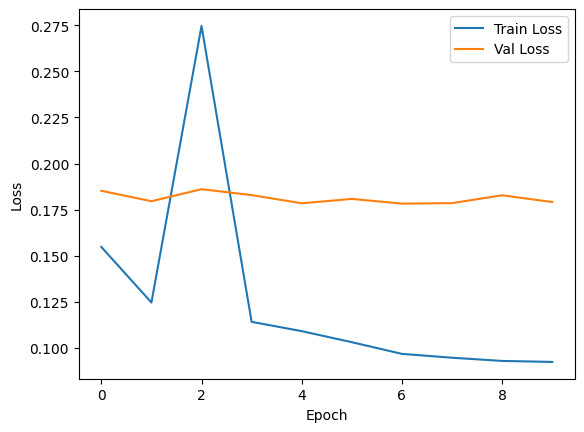

In [146]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

ya ini untuk graphnya,

dari grafiknya kita bisa lihat bahwa selama proses pelatihan, Training Loss mengalami penurunan yang konsisten setelah epoch ke-2, menunjukkan bahwa model semakin baik dalam menyesuaikan pola data pada dataset pelatihan.

cuman saayngnya, terlihat adanya lonjakan signifikan pada epoch ke-2, yang bisa disebabkan oleh adaptasi model terhadap pola yang lebih kompleks. Setelah itu, training loss stabil dan menurun secara bertahap, yang merupakan indikasi proses pembelajaran yang baik.

Nah ... kalau ini yaaa aga jelek ya val lossnya, Validation Loss disini kayak cenderung stabil tanpa penurunan signifikan setelah epoch kedua. Ini menunjukkan model mungkin sudah mencapai titik optimal dalam mengenali pola dari dataset validasi dan berpotensi mengalami sedikit overfitting karena tidak selaras dengan penurunan training loss.

Yah overall udah cukup bagus tapi bisa diimprove lagi sih tapi kita coba lihat testingnya yak

## Testing the Model

In [151]:
def test_regression_model(test_ds, model, scaler=None, original_feature_count=10):
    y = []
    y_preds = []

    for inputs, labels in test_ds:
        y_pred = model.predict(inputs)
        if scaler:
            labels = np.array(labels).reshape(-1, 1)
            padded_labels = np.zeros((labels.shape[0], original_feature_count))
            padded_labels[:, 0] = labels.flatten()
            labels = scaler.inverse_transform(padded_labels)[:, 0]
            padded_preds = np.zeros((y_pred.shape[0], original_feature_count))
            padded_preds[:, 0] = y_pred.flatten()
            y_pred = scaler.inverse_transform(padded_preds)[:, 0]
        y.extend(labels.tolist())
        y_preds.extend(y_pred.tolist())
    y, y_preds = np.squeeze(y), np.squeeze(y_preds)
    return {
        'mae': mean_absolute_error(y, y_preds),
        'mse': mean_squared_error(y, y_preds),
        'r2': r2_score(y, y_preds)
    }

In [152]:
test_regression_model(test_ds,model,scaler)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━

{'mae': 0.16207870161640472,
 'mse': 0.047686521780564595,
 'r2': 0.7118564052651974}

Oke lets breakdown hasil testing kita, disini kita lihat model menghasilkan nilai MAE (Mean Absolute Error) sebesar 0.162, MSE (Mean Squared Error) sebesar 0.0477, dan R2 (R-squared) sebesar 0.712.

Disini Nilai MAE yang relatif kecil mengindikasikan bahwa rata-rata kesalahan prediksi terhadap nilai asli cukup rendah, menunjukkan bahwa model mampu memprediksi harga dengan akurasi yang cukup baik.

Di sisi lain nilai MSE juga rendah mendukung nilai MAE kita kalau  selisih kuadrat antara prediksi dan nilai sebenarnya tidak terlalu besar, menandakan error tidak menyebar secara signifikan.

Nah cumannnnn Nilai R2 sebesar 0.712 menandakan bahwa sekitar 71.2% variasi dalam data uji dapat dijelaskan oleh model ini, yang cukup memadai dalam konteks regresi. Ini menunjukkan bahwa model mampu menangkap pola utama dari data historis dengan baik. Tapi belum 80% :".

Namun, meskipun hasil ini cukup baik, perbedaan antara performa di data training dan validation yang stagnan sebelumnya mengindikasikan adanya potensi overfitting. Model tampak mampu belajar dengan sangat baik pada data pelatihan, tetapi tidak sepenuhnya mampu menggeneralisasi ke data yang belum pernah dilihat (data uji). Ini mungkin disebabkan oleh kompleksitas model yang terlalu tinggi atau kurangnya variasi dalam data pelatihan.

Yaks paling kedepannya kita bisa pertimbangin menambah regularisasi seperti Dropout, melakukan cross-validation yang lebih ketat, atau menambah jumlah data pelatihan untuk meningkatkan generalisasi model SAMA SATU HAL LAGI FAVORIT SAYA EARLY STOPPING :).

## Kesimpulan

kesimpulannya model kita blm sepenuhnya optimal dalam memprediksi harga avocado karena terlihat potensi overfitting di validationnya. Walaupun begitu kita bisa lihat model yang udah cukup bagus memprediksi ketika di training dan testing sehingga kita bisa bilang model kita ga gagal sepenuhnya dan sudah berhasil menangkap pola data yang ada. Kedepannya paling siapin Code grid search aja sih untuk mencari best scenario dr model kita.

# Implement a bidirectional RNN model for task no. 2. Analyze the impact of making the model bidirectional on the model's performance compared to the baseline trained in no. 2 (max. 4 points)

In [157]:
inputs = tf.keras.Input(shape=(window_size, x_train.shape[-1]))
model_layers = layers.Bidirectional(layers.GRU(256, activation="relu", return_state=False, return_sequences=True))(inputs)
model_layers = layers.Dropout(0.2)(model_layers)
model_layers = layers.Bidirectional(layers.GRU(64, activation="relu", return_state=False, return_sequences=False))(model_layers)
model_layers = layers.Dropout(0.2)(model_layers)
out = layers.Dense(1, activation="linear")(model_layers)
model_bi = Model(inputs=inputs, outputs=out)
model_bi.compile(loss='MeanSquaredError', metrics=['MAE'], optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
model_bi.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 54, 11)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 54, 512)        │       413,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 54, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       221,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,265 (2.42 MB)

 Trainable params: 635,265 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [159]:
model_bi.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 177s 445ms/step - MAE: 0.2845 - loss: 0.1595
Epoch 2/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 202s 446ms/step - MAE: 0.2243 - loss: 0.0934
Epoch 3/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 204s 452ms/step - MAE: 0.2177 - loss: 0.0877
Epoch 4/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 180s 452ms/step - MAE: 0.2147 - loss: 0.0853
Epoch 5/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 202s 453ms/step - MAE: 0.2109 - loss: 0.0829
Epoch 6/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 204s 457ms/step - MAE: 0.2093 - loss: 0.0823
Epoch 7/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 181s 455ms/step - MAE: 0.2090 - loss: 0.0819
Epoch 8/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 178s 447ms/step - MAE: 0.2055 - loss: 0.0799
Epoch 9/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 207s 460ms/step - MAE: 0.2035 - loss: 0.0801
Epoch 10/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 183s 461ms/step - MAE: 0.2017 - loss: 0.0763


In [160]:
loss_base, mae_base = model.evaluate(x_test, y_test)

loss_bi, mae_bi = model_bi.evaluate(x_test, y_test)

print(f"Unidirectional Model - Loss: {loss_base}, MAE: {mae_base}")
print(f"Bidirectional Model - Loss: {loss_bi}, MAE: {mae_bi}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - MAE: 0.3210 - loss: 0.1912
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - MAE: 0.3178 - loss: 0.1865
Unidirectional Model - Loss: 0.19074609875679016, MAE: 0.3241574466228485
Bidirectional Model - Loss: 0.18029218912124634, MAE: 0.312215656042099


### ATTENTION PLS

Nah jadi ini sebenernya saya salah print ya pak greg, harusnya itu loss_base ama mae_base doesnt exist ( tapi karena running sebelumnya saya pakai itu jadi muncul dia ) mau rerun tapi ga sanggup nunggu sejeman TT jadi saya explain aja di markdown dibawah ini

## Comparison

oke untuk comparisonnya harusnya:
Yang non bidirectional atau kita sebut unidirectional karena satu arah ya itu Lossnya 0.14 ditamah dengan MAEnya itu 0.16 jadi jauh lebih kecil jika kita compare dengan biderictional nah walaupun begitu kita bisa blg ini model biderictional hasilnya not badlah ya karena nilai MAEnya ga drastis banget sih tapi tetep lebih kecil dari model based kita. Balik lagi loss dan MAENYA beda cukup jauh sama base sehingga kita bisa blg odds model biderictional untuk melakukan kesalahan lebih tinggi dari base line model kita.

Nah kenapa sih hal ini bisa terjadi main reasonnya udah jelas yak one and only ya karena Datasets kita yang ga cocok dengan pola yang diterapkan oleh biderictional dimana forward and backward. Soalnya balik lagi hidden state, epochs dan input maupun activation itu udah kita samain dengan directional satu satunya pembeda ya , yang satu unidirectional dan yang satu biderictional. Jadi ya udah jelas kalau compare head to head kalau emang ini modelnya aja yang ga cocok dengan datasetnya gitu.

 Solusinya gimana ? bisa aja sih kalau mau fine tuning tapi kalau emang udah ga cocok ya bisa ganti dataset atau ganti model.

# Final Evalutaion

untuk sekarang saya akan bilang memprediksi price average avocado ini menggunakan model base line GRU giving better result dibandingin model biderictional terlihat jelas dari nilai maenya dan lossnya. Untuk Hasil dari GRU sendiri dengan Maenya yang 0.16 dan MSE yang 0.04 meneksplain kalau model yang kita punya memiliki persentase 16% untuk meleset dari actual pricenya sedangkan msenya 0.04 artinya sebesar 4% jarak Actual dan predicted price ketika meleset di prediksi yang ga jauh jauh amat lah tapi dalam beberpaa case ini bisa bahaya sih karena UANG masalahnya ini. Ditambah dengan R^2 yang 71 % mengindikasikan model bisa menjelaskan variasi data sebesar 71% udh baguslah but can be improve with fine tuning later in future works

#  In your own words, explain briefly how image segmentation models differ from object detection models! (max. 2 points)

Image segmentation dengan object detection.
Seperti yang kita ketahui both image segmentation dan object detection itu dua duanya CNN ,

namun hal yang membedakan mereka pertama adalah segi task mereka,

* dimana image segmentation merupakan multiclass dimana hasil nantinya probability class untuk 1 variabel sedangkan object detection dia merupakan multitask dimana output lebih dari 1 dan tasknya lebih dari 1, jadi outputnya ada yg classification ada regression.

* next dari hasil mereka dimana  image segmen Menghasilkan pixel-wise classification (mask) untuk setiap objek pada gambar, sehingga setiap piksel diberi label sesuai dengan objeknya. Sedangkan object detection memberikan output bounding box dimana hasilnya kurang detil jika kita compare head to head dengan apa yang diksh image segmentation

* terakhir dari segi kegunaan dimana image segmentation itu Digunakan ketika informasi lokasi dan bentuk objek secara presisi diperlukan. Sedangkan Object detection dia digunain ketika hanya lokasi objek dan klasifikasinya yang penting

* contohnya kalau Image segmentation kayak segmentasi jalan dari peta sedangkan object detection tuh kayak deteksi orang dari cctv ( biasanya kan kayak ada tuh bounding boxnya atau kalau kita foto pake kamera biasanya kalau terdeteksi diksh kotak otomatis ama HP)

# Explain the differences between instance, semantic, and panoptic segmentations! (max. 3 points)

Perbedaan 1: Tipe Task

- Semantic Segmentation: Termasuk dalam multiclass classification karena setiap piksel diklasifikasikan ke dalam satu kelas tertentu.
- Instance Segmentation: Masih termasuk multiclass, tetapi dengan tambahan identifikasi instance unik untuk objek yang sama.
- Panoptic Segmentation: Multiclass juga dan merupakab Kombinasi dari semantic dan instance segmentation, di mana setiap piksel tidak hanya diklasifikasikan berdasarkan kelas, tetapi juga diidentifikasi secara individual jika merupakan objek yang bisa dihitung (countable object) seperti "mobil," "manusia," dll.

Perbedaan 2: Klasifikasi Objek

- Semantic Segmentation: Hanya mengelompokkan objek berdasarkan kelasnya tanpa membedakan objek yang berbeda dalam kelas yang sama. Semua mobil dalam gambar dianggap satu kelompok yang sama.
- Instance Segmentation: Dia tuh Membedakan setiap objek secara individual meskipun berada di kelas yang sama. Setiap mobil dalam gambar akan dianggap sebagai objek terpisah.
- Panoptic Segmentation: Setiap piksel mendapatkan label kelas, dan objek yang dapat dihitung (seperti mobil atau manusia) memiliki ID unik, sedangkan objek yang tidak dapat dihitung (seperti jalan atau langit) hanya diberi label kelas.

Perbedaan 3: Representasi Label

- Semantic Segmentation: Setiap piksel memiliki satu label dari sekumpulan kelas yang didefinisikan.
- Instance Segmentation: Setiap piksel memiliki label kelas dan ID unik untuk membedakan instance-nya.
- Panoptic Segmentation: Kombinasi keduanya, piksel pada objek terhitung memiliki label kelas dan ID instance, sementara piksel pada objek tidak terhitung hanya memiliki label kelas.

Analogika + Kesimpulan
- Semantic Segmentation : tuh kayak contoh disebuah lingkungan kita cuman tau ya disitu ada 100 rumah ga peduli dengan apa yang ada dikisarannya gitu. patokannya pada jenis objek bukan individu objek.
- Instance Segmentation : Ini tuh kalau dalam sebuah lingkungan mobil yang warnanya beda , beda klasifikasi kalau di semantic dianggep satu.
- Panoptic Segmentation: Ini Tuh ya gabungannya kayak kita tidak hanya bisa melihat bahwa itu adalah mobil dan jalan, tetapi juga bisa membedakan setiap mobil secara individual sambil tetap memahami bahwa area di sekitarnya adalah jalan,taman, atau bangunan. Kita punya pemahaman lengkap tentang kelasnya (jalan, taman, mobil) dan juga objek individunya (mobil 1, mobil 2, mobil 3).

# Tell me a joke related to CNN or RNN (max. 1 point)

Why CNN never join any discussions?

Because it prefers to look at images rather than listen to stories!